# Статистическая проверка гипотез

Статистическая проверка гипотез состоит из следующих этапов:
1. Формулировка основной гипотезы $H_0$ и конкурирующей гипотезы $H_1$. Часто $H_1$ - это гипотеза, противоположная $H_0$
2. Задание уровня значимости $\alpha$ (обычно берут равным 0.05), на основании которого будет сделан вывод о справедливости гипотезы. Он равен вероятности допустить ошибку первого рода, то есть отклонить гипотезу $H_0$, когда на деле она верна
3. Расчет статистики $\phi$ критерия, зависяещей от исходной выборки, то есть, если выборка $X = (X_1, X_2, ..., X_n)$, то $\phi = \phi(X_1, X_2, ..., X_n)$. Эта статистика также является случайной величиной, но она уже подчиняется некоторому закону распределения.
4. На основе значения статистики $\phi$ и закона распределения, которому она должна подчиняться, выносится решение о принятии (или отвержении) гипотезы $H_0$

Рассмотрим на примерах

## Пример 1

Попробуем решить простую задачу. Давайте сгенеририруем некоторую выборку размера $n$ из нормального распределения со средним $\mu$ и дисперсией $\sigma^2$. Будем на основе полученной выборки проверять гипотезу о том, что среднее генеральной совокупности в действительности равняется $\mu$.

Известно, что случайная величина $\frac{\overline{X} - \mu}{S / \sqrt{n}}$, где $\overline{X}$ - выборочное среднее, а $S^2$ - выборочная дисперсия имеет распределение Стьюдента с n - 1 степенью свободы

Сгенерируем K = 20000 выборок и построим распределение статистики, описанной выше

In [1]:
import numpy as np
import scipy.stats as st

# for reproducibility
np.random.seed(42)

mu = -1
sigma = 2
K = 20000
n = 20
dist = np.zeros(K)
for i in range(K):
    x = np.random.normal(loc=mu, scale=sigma, size=n)
    dist[i] = (np.mean(x) - mu) / (np.std(x, ddof=1) / np.sqrt(n))

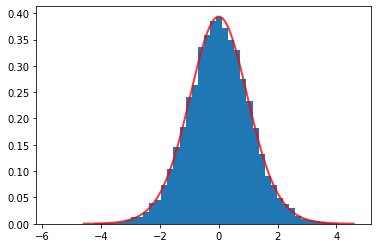

In [2]:
import matplotlib.pyplot as plt
plt.hist(dist, bins=50, density=True)
df = n - 1
a = np.linspace(st.t.ppf(0.0001, df),
                st.t.ppf(0.9999, df), 100)
plt.plot(a, st.t.pdf(a, df),
       'r-', lw=2, alpha=0.8)
plt.show()

Как видим, теоретическое распределение и полученное при моделировании совпадают. Что же нам дает знание распределения? С помощью знаний о распределении мы можем оценивать, насколько правдоподобное значение статистики мы получили при условии правильности нулевой гипотезы. Для этих задач используется p-value, которое показывает вероятность получить подобное или еще большее отклонение статистики от ожидаемого значения.

Пусть, например, мы получили статистику $\phi = 2.6$. Нужно как-то понять, это много или мало. Для этого удобно посмотреть на распределение статистики:

<img src="https://psv4.userapi.com/c237331/u81775619/docs/d3/2a093cea0160/image.png?extra=VuP4QS6imxdh3t_e0WyU0kspuBu6s8vMnrrNN197rH28lMIhi8FQVwa96w3QmtYA1Pb3lLuRAHumCpUfxFyON-i7zi97SshRMefqBRxJ-zuqfP2BxM12xlfXZmY5ay2ghET0NxAAJyT9ZV48SrZ0SQ" height=400 />

(кстати, поиграться с различными распределениями можно на сайте https://gallery.shinyapps.io/dist_calc/)

Имея данное распределение статистики, получить значения менее -2.6 или более 2.6 равно 0.0176. То есть чисто случайно, получить значения статистики 2.6 или более аномальные мы можем с вероятностью 0.0176, что меньше порога допустимой вероятности ошибок первого рода, который обычно берется равным $\alpha = 0.05$. Поэтому нулевую гипотезу можно отклюнить.

Кратко: Если p-value меньше $\alpha$, то нулевую гипотезу отклоняем

Теперь давайте сгенерируем выборку из нормального распределения со средним 0 и дисперсией 1, и проверим 2 гипотезы.
1. $H_0: \mu = 0$, $H_1: \mu \neq 0$
2. $H_0: \mu = 1.5$, $H_1: \mu \neq 1.5$

In [3]:
def test_mu(x, mu):
    # рассчитаем статистику
    n = len(x)
    stat = (np.mean(x) - mu) / (np.std(x, ddof=1) / np.sqrt(n))
    p = (1 - st.t.cdf(abs(stat), df = n - 1)) + st.t.cdf(-abs(stat), df = n - 1)
    return {"stat": stat, "p-value": p}

In [4]:
n = 20
x = np.random.normal(size=n)

1. $H_0: \mu = 0$, $H_1: \mu \neq 0$

In [5]:
test_mu(x, 0)

{'stat': -0.22485624708143953, 'p-value': 0.8244917079577923}

p-value больше 0.05, поэтому нулевую гипотезу не отклоняем

2. $H_0: \mu = 1.5$, $H_1: \mu \neq 1.5$

In [6]:
test_mu(x, 1.5)

{'stat': -6.181483993101722, 'p-value': 6.121176466218136e-06}

p-value меньше 0.05, поэтому нулевую гипотезу отклоняем

На самом деле этот тест уже есть готовый из коробки в библиотеке scipy. Покажем, как им пользоваться

In [7]:
st.ttest_1samp(x, 1.5)

Ttest_1sampResult(statistic=-6.181483993101722, pvalue=6.1211764662912005e-06)

## Пример 2. Ttest

Ttest или тест Стьюдента используется для сравнения средних двух распределений. Пусть имеются две независимые выборки объемами $n_1, n_2$ нормально распределенных случайных величин $X_1$, $X_2$, с примерно равной дисперсией. Необходимо проверить по выборочным данным нулевую гипотезу равенства математических ожиданий этих случайных величин $H_0: \mu_0 = \mu_1$.

Пусть s_1^2 и s_2^2 - выборочные дисперсии распределений, $\overline{X_1}, \overline{X_2}$ - средние. Тогда статистика теста рассчитывается по формуле:
$$
t = \frac{\overline{X_1} - \overline{X_2}}{\sqrt{\frac{s_1^2}{n_1} + \frac{s_2^2}{n_2}}}
$$

Эта статистика будет иметь распределение Стьюдента с числом степеней свободы $df = n_1 + n_2 - 2$

In [8]:
n1 = 20
n2 = 30

x1 = np.random.normal(size = n1)
x2 = np.random.normal(size = n2)
st.ttest_ind(x1, x2)

Ttest_indResult(statistic=0.07451625779568515, pvalue=0.9409092923114994)

Как видим, должны принять нулевую гипотезу о равенстве средних (неудивительно, ведь генерировали из распределений с одинаковым средним)

In [9]:
n1 = 20
n2 = 30

x1 = np.random.normal(size = n1)
x2 = np.random.normal(loc = 1.25, size = n2)
st.ttest_ind(x1, x2)

Ttest_indResult(statistic=-3.5054500896438507, pvalue=0.0009988601819338595)

В этом случае должны нулевую гипотезу отклонить

## A/B-тестирование

A/B-тестирование — это инструмент, который помогает командам проверять гипотезы и принимать решения на основе данных, а не интуиции. Суть метода заключается в том, чтобы разделить аудиторию на части и показать ей разные варианты чего-либо, чтобы понять, какая версия лучше.

Для проведения A/B-тестирования нужно определиться с некоторыми моментами:

1. Поставить цель исследования, то есть понять, что же мы пытаемся изменить в продукте
2. Выбрать метрику или метрики, на которые будем смотреть при определении лучшей версии
3. Выбрать гипотезу, которая будет связана с главной метрикой теста
4. Подготовить обе версии продукта (текущую и измененную)
5. Провести эксперимент и накопить данные
6. Проанализировать полученную информацию, принять решение об успешности проведенного теста